<p align="left">
  <a href="https://colab.research.google.com/github/fernandoarcevega/AI_Workshop/blob/main/Part_1/03_KNN/03_knn_pckg.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab" width="200">
  </a>
</p>

In [ ]:
###############################################
# Author 1: Wilfrido Gómez-Flores (CINVESTAV) #
# Author 2: Fernando Arce-Vega (CIO)          #
# e-mail 1: wilfrido.gomez@cinvestav.mx       #
# e-mail 2: farce@cio.mx                      #
# Date:     nov/03/2025                       #
# Subject:  k-NN algorithm                    #
###############################################

In [ ]:
# Libraries
import numpy as np                                                    # Numerical array operations
from sklearn.neighbors import KNeighborsClassifier                    # Machine learning model
import pandas as pd                                                   # Data manipulation/analysis
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay  # Model evaluation
import matplotlib.pyplot as plt                                       # Data plotting/visualization

In [ ]:
# Other functions
!wget -q https://raw.githubusercontent.com/fernandoarcevega/AI_Workshop/main/helpers/misc.py
from misc import *

In [ ]:
# Load dataset
# Path to dataset
path = 'https://raw.githubusercontent.com/fernandoarcevega/AI_Workshop/main/datasets/bus_data.csv'
T = pd.read_csv(path)
data = T.values
n, d = data.shape
X = data[:, :d-1]  # Features
Y = data[:, d-1]   # Class labels

In [ ]:
# Check feature and targets shapes
print(f'Features shape: {X.shape}')
print(f'Targets shape:  {Y.shape}')

Features shape: (3287, 19)
Targets shape:  (3287,)


 🔵 🔵 🔵 🔵 🔵 🔵 🔵 🔵 🔵 🔵  (Total data)

 🟢 🟢 🟢 🟢 🟢 🟢 🟢 🟢 🟡 🟡  (Training and testing data)

In [ ]:
# Split dataset into training and test sets (80%-20%)
tr, tt = HoldOut(Y, 0.2)

# Training set
Xtr = X[tr, :]
Ytr = Y[tr]

# Test set
Xtt = X[tt, :]
Ytt = Y[tt]

In [ ]:
# Check feature and targets shapes for training and test sets
print(f'Training features shape: {Xtr.shape}')
print(f'Training targets shape:  {Ytr.shape} \n')
print(f'Testing features shape:  {Xtt.shape}')
print(f'Testing targets shape:   {Ytt.shape}')

Training features shape: (2630, 19)
Training targets shape:  (2630,) 

Testing features shape:  (657, 19)
Testing targets shape:   (657,)


In [ ]:
# Data normalization
Xtr, stats = zscorenorm(Xtr)
Xtt = zscorenorm(Xtt, stats)

The **Euclidean distance** is a commonly used metric to determine the proximity between data points:

$$ d_2(\mathbf{a}, \mathbf{b}) = \left(\sum_{i=1}^{d} |a_i - b_i|^2\right)^{1/2}. $$

The posterior probability is calculated directly as

$$ p(\omega_i|\mathbf{x}) = \frac{k_i}{k}, $$

where $k_i$ is the number of class $\omega_i$ training samples nearest to $\mathbf{x}$.

**k-NN algorithm**:
$$
\begin{align*}
& \textbf{input:} \quad X = \{\mathbf{x}_i, y_i\}_{i=1}^n, \mathbf{x}_t, k \\
\\
1: \quad & \textbf{for each } \mathbf{x}_i \in X \textbf{ do} \\
2: \quad &  \text{Compute distance } d_2(\mathbf{x}_i, \mathbf{x}_t) \\
3: \quad & \text{Select } X_k \subseteq X, \text{ the set of } k\text{-NNs to } \mathbf{x}_t \\
\\
& \textbf{return:} \quad y_t = \operatorname*{arg\,max}_{j=1, \dots, c} \sum_{\mathbf{x}_i \in X_k} \mathbf{1}_j(y_i)
\end{align*}
$$

In [ ]:
# Instantiate model
model = KNeighborsClassifier(n_neighbors=3)

# Train model
model.fit(Xtr, Ytr)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Classify test data
Ypp = model.predict(Xtt)

In [ ]:
# Print classification error
err = np.mean(Ypp != Ytt)
print(f'Error: {100 * err:.3f}%')

Error: 18.113%


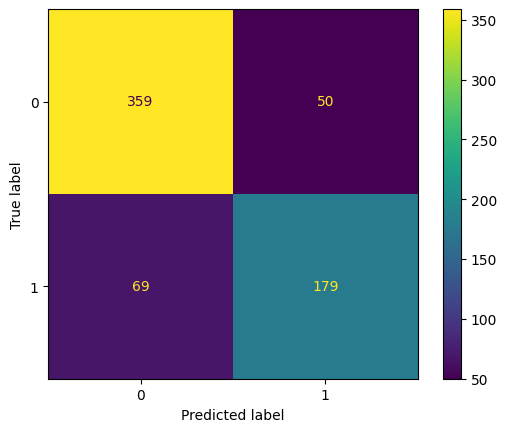

In [ ]:
# Confusion matrix
cm = confusion_matrix(Ytt, Ypp)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()